In [443]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

In [444]:
def diagrama(V_R, V_X, phi):
    # Cálculo das componentes vetoriais
    V_R_x = V_R
    V_R_y = 0

    V_X_x = V_X * np.cos(phi)
    V_X_y = V_X * np.sin(phi)

    V_0_x = V_R_x + V_X_x
    V_0_y = V_R_y + V_X_y
    
    # Cálculo da fase entre V_0 e V_R (theta)
    theta = np.arctan2(V_0_y, V_0_x)

    # Criação da figura com formato quadrado
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Definindo cores para cada vetor
    colors = ['red', 'blue', 'green']
    
    # Plotando os vetores
    ax.quiver(0, 0, V_R_x, V_R_y, angles='xy', scale_units='xy', scale=1,
              color=colors[0], width=0.012, label=f'$V_R$ = {V_R:.1f}')
    
    ax.quiver(0, 0, V_X_x, V_X_y, angles='xy', scale_units='xy', scale=1,
              color=colors[1], width=0.012, label=f'$V_X$ = {V_X:.1f}')
    
    ax.quiver(0, 0, V_0_x, V_0_y, angles='xy', scale_units='xy', scale=1,
              color=colors[2], width=0.012, label=f'$V_0$ = {np.sqrt(V_0_x**2 + V_0_y**2):.1f}')
    
    # Linhas auxiliares
    ax.plot([V_R_x, V_0_x], [0, V_0_y], 'k--', alpha=0.3)
    ax.plot([V_0_x, V_0_x], [0, V_0_y], 'k--', alpha=0.3)
    
    # Configurações do gráfico
    max_val = max(np.abs([V_R_x, V_X_x, V_0_x, V_X_y, V_0_y])) * 1.3  # Margem maior
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(y=0, color='k', alpha=0.3)
    ax.axvline(x=0, color='k', alpha=0.3)
    
    # Títulos
    plt.title('Diagrama de Fasores', fontsize=15, pad=20)
    plt.xlabel('Componente Real', fontsize=12)
    plt.ylabel('Componente Imaginarária', fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    
    # Raio dos arcos (ajustado para evitar bordas)
    arc_radius_phi = min(V_X * 1.2, max_val/3)
    arc_radius_theta = min(np.sqrt(V_0_x**2 + V_0_y**2) * 0.6, max_val/2.5)
    
    # Ângulo phi em azul
    arc_phi = np.linspace(0, phi, 30)
    ax.plot(arc_radius_phi * np.cos(arc_phi), arc_radius_phi * np.sin(arc_phi), 
            'b-', alpha=0.7, linewidth=1.5)
    
    # Ângulo theta em roxo
    arc_theta = np.linspace(0, theta, 30)
    ax.plot(arc_radius_theta * np.cos(arc_theta), arc_radius_theta * np.sin(arc_theta), 
            'purple', linewidth=2.5, alpha=0.8)
    
    # Posicionamento inteligente dos textos
    def get_text_position(angle, radius, offset_factor=1.3, angle_offset=0.15):
        # Ângulo ajustado para evitar eixos
        adjusted_angle = angle/2 + angle_offset * (1 if angle > 0 else -1)
        return (
            radius * np.cos(adjusted_angle) * offset_factor,
            radius * np.sin(adjusted_angle) * offset_factor
        )
    
    # Posições dos textos (com offset angular)
    phi_text_x, phi_text_y = get_text_position(phi, arc_radius_phi, 1.3)
    theta_text_x, theta_text_y = get_text_position(theta, arc_radius_theta, 1.4, 0.2)
    
    # Deslocamento vertical se necessário
    angle_diff = abs(theta - phi)
    if angle_diff < 0.5:  # Ângulos próximos
        separation = max_val * 0.08
        if phi > 0:
            phi_text_y += separation
            theta_text_y -= separation
        else:
            phi_text_y -= separation
            theta_text_y += separation
    
    # Texto para phi (azul)
    ax.text(phi_text_x, phi_text_y, f'φ = {np.degrees(phi):.2f}°', 
            color='blue', fontsize=12, weight='bold',
            ha='center', va='center')
    
    # Texto para theta (roxo)
    ax.text(theta_text_x, theta_text_y, f'θ = {np.degrees(theta):.2f}°', 
            color='purple', fontsize=13, weight='bold',
            ha='center', va='center')
    
    # Linha de referência para theta
    ax.plot([0, arc_radius_theta * np.cos(theta)], 
            [0, arc_radius_theta * np.sin(theta)], 
            'purple', linestyle=':', alpha=0.5)
    
    plt.tight_layout()

In [445]:
V_R = 11.1
V_X = 5.7
phi = -0.88*np.pi/180

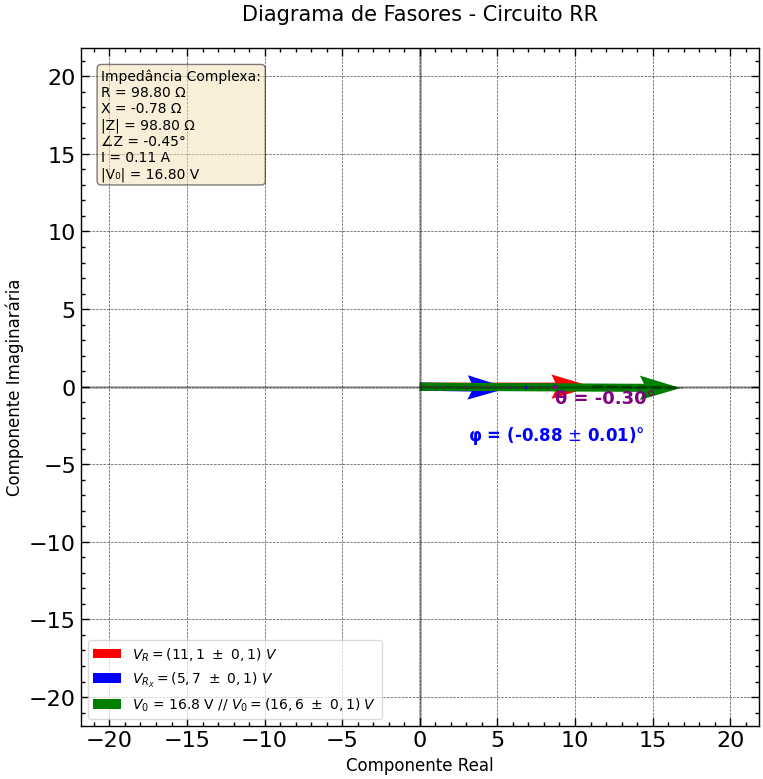

In [446]:
V_R_x = V_R
V_R_y = 0

V_X_x = V_X * np.cos(phi)
V_X_y = V_X * np.sin(phi)

V_0_x = V_R_x + V_X_x
V_0_y = V_R_y + V_X_y

# Cálculo da fase entre V_0 e V_R (theta)
theta = np.arctan2(V_0_y, V_0_x)

# Criação da figura com formato quadrado
fig, ax = plt.subplots(figsize=(8, 8))

# Definindo cores para cada vetor
colors = ['red', 'blue', 'green']

# Plotando os vetores
ax.quiver(0, 0, V_R_x, V_R_y, angles='xy', scale_units='xy', scale=1,
        color=colors[0], width=0.012, label='$V_R = (11,1 \ \pm \ 0,1) \ V$ ')

ax.quiver(0, 0, V_X_x, V_X_y, angles='xy', scale_units='xy', scale=1,
        color=colors[1], width=0.012, label='$V_{R_X} = (5,7\ \pm \ 0,1) \ V$')

ax.quiver(0, 0, V_0_x, V_0_y, angles='xy', scale_units='xy', scale=1,
        color=colors[2], width=0.012, label=f'$V_0$ = {np.sqrt(V_0_x**2 + V_0_y**2):.1f} V // $V_0 = (16,6 \ \pm \ 0,1) \ V$')

# Linhas auxiliares
ax.plot([V_R_x, V_0_x], [0, V_0_y], 'k--', alpha=0.3)
ax.plot([V_0_x, V_0_x], [0, V_0_y], 'k--', alpha=0.3)

# Configurações do gráfico
max_val = max(np.abs([V_R_x, V_X_x, V_0_x, V_X_y, V_0_y])) * 1.3  # Margem maior
ax.set_xlim(-max_val, max_val)
ax.set_ylim(-max_val, max_val)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.axhline(y=0, color='k', alpha=0.3)
ax.axvline(x=0, color='k', alpha=0.3)

# Títulos
plt.title('Diagrama de Fasores - Circuito RR', fontsize=15, pad=20)
plt.xlabel('Componente Real', fontsize=12)
plt.ylabel('Componente Imaginarária', fontsize=12)

# Raio dos arcos (ajustado para evitar bordas)
arc_radius_phi = min(V_X * 1.2, max_val/3)
arc_radius_theta = min(np.sqrt(V_0_x**2 + V_0_y**2) * 0.6, max_val/2.5)

# Ângulo phi em azul
arc_phi = np.linspace(0, phi, 30)
ax.plot(arc_radius_phi * np.cos(arc_phi), arc_radius_phi * np.sin(arc_phi), 
        'b-', alpha=0.7, linewidth=1.5)

# Ângulo theta em roxo
arc_theta = np.linspace(0, theta, 30)
ax.plot(arc_radius_theta * np.cos(arc_theta), arc_radius_theta * np.sin(arc_theta), 
        'purple', linewidth=2.5, alpha=0.8)

# Posicionamento inteligente dos textos
def get_text_position(angle, radius, offset_factor=1.3, angle_offset=0.15):
        # Ângulo ajustado para evitar eixos
        adjusted_angle = angle/2 + angle_offset * (1 if angle > 0 else -1)
        return (
                radius * np.cos(adjusted_angle) * offset_factor,
                radius * np.sin(adjusted_angle) * offset_factor
        )

# Posições dos textos (com offset angular)
phi_text_x, phi_text_y = get_text_position(phi, arc_radius_phi, 1.3)
theta_text_x, theta_text_y = get_text_position(theta, arc_radius_theta, 1.4, 0.2)

# Deslocamento vertical se necessário
angle_diff = abs(theta - phi)
if angle_diff < 0.5:  # Ângulos próximos
        separation = max_val * 0.08
if phi > 0:
        phi_text_y += separation
        theta_text_y -= separation
else:
        phi_text_y -= separation
        theta_text_y += separation

# Texto para phi (azul)
ax.text(phi_text_x, phi_text_y, f'φ = ({np.degrees(phi):.2f} $\pm$ 0.01)°', 
        color='blue', fontsize=12, weight='bold',
        ha='center', va='center')

# Texto para theta (roxo)
ax.text(theta_text_x, theta_text_y, f'θ = {np.degrees(theta):.2f}°', 
        color='purple', fontsize=13, weight='bold',
        ha='center', va='center')

# Linha de referência para theta
ax.plot([0, arc_radius_theta * np.cos(theta)], 
        [0, arc_radius_theta * np.sin(theta)], 
        'purple', linestyle=':', alpha=0.5)

# Cálculo da impedância complexa
# Resistência R = V_R / I
R = 98.8
I = V_R/R

# Cálculo da impedância complexa
X = (V_X * np.sin(phi)) / I
Z = complex(R, X)
Z_mag = abs(Z)
Z_phase = np.angle(Z, deg=True)
V_0 = complex(V_0_x, V_0_y)

# Texto de resultados - posicionamento inteligente
textstr = '\n'.join((
f'Impedância Complexa:',
f'R = {R:.2f} Ω',
f'X = {X:.2f} Ω',
f'|Z| = {Z_mag:.2f} Ω',
f'∠Z = {Z_phase:.2f}°',
f'I = {I:.2f} A',
f'|V₀| = {abs(V_0):.2f} V'
))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Determinar melhor posição para a caixa de texto
# Com base na posição dos vetores
dominant_quadrant = 0
if V_0_x > 0 and V_0_y > 0: dominant_quadrant = 1
elif V_0_x < 0 and V_0_y > 0: dominant_quadrant = 2
elif V_0_x < 0 and V_0_y < 0: dominant_quadrant = 3
elif V_0_x > 0 and V_0_y < 0: dominant_quadrant = 4

# Posicionar caixa no quadrante oposto
if dominant_quadrant in [1, 4]:
        # Vetores dominam direita -> colocar texto à esquerda
        text_x = 0.03
        text_y = 0.97
        halign = 'left'
        valign = 'top'  
elif dominant_quadrant == 2:
        # Vetores dominam superior esquerdo -> colocar inferior direito
        text_x = 0.97
        text_y = 0.03
        halign = 'right'
        valign = 'bottom'
else:
        # Default: superior esquerdo
        text_x = 0.03
        text_y = 0.97
        halign = 'left'
        valign = 'top'

ax.text(text_x, text_y, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment=valign, horizontalalignment=halign,
        bbox=props)

# Posicionar legenda em local seguro
if dominant_quadrant in [1, 4]:
# Se vetores na direita, legenda na esquerda inferior
        leg_loc = 'lower left'
else:
# Caso contrário, direita inferior
        leg_loc = 'lower right'

plt.legend(loc=leg_loc, fontsize=10, framealpha=0.7)


plt.tight_layout()

In [447]:
V_R=3.36
V_X=21.4
phi=91*np.pi/180

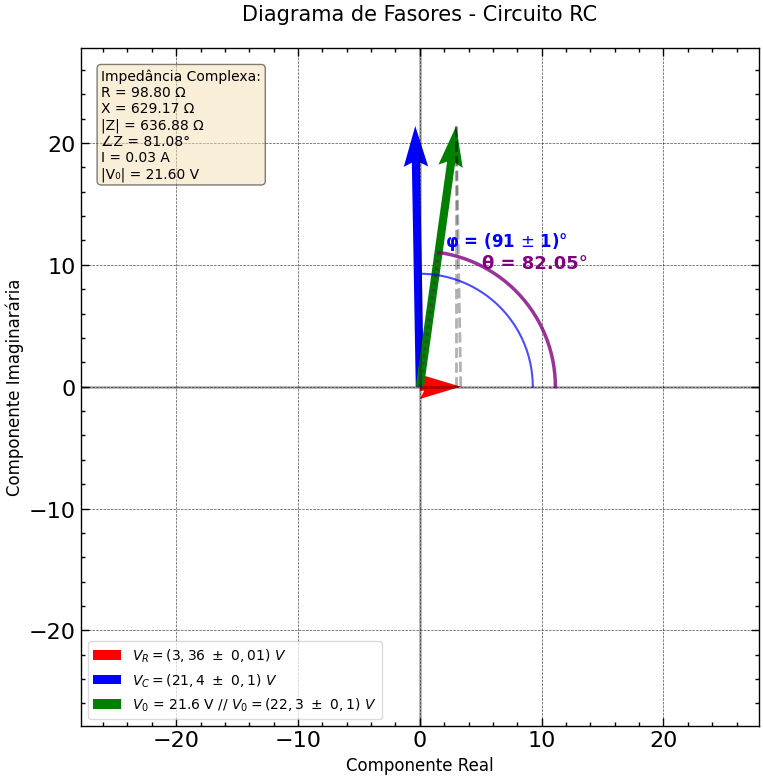

In [448]:
V_R_x = V_R
V_R_y = 0

V_X_x = V_X * np.cos(phi)
V_X_y = V_X * np.sin(phi)

V_0_x = V_R_x + V_X_x
V_0_y = V_R_y + V_X_y

# Cálculo da fase entre V_0 e V_R (theta)
theta = np.arctan2(V_0_y, V_0_x)

# Criação da figura com formato quadrado
fig, ax = plt.subplots(figsize=(8, 8))

# Definindo cores para cada vetor
colors = ['red', 'blue', 'green']

# Plotando os vetores
ax.quiver(0, 0, V_R_x, V_R_y, angles='xy', scale_units='xy', scale=1,
        color=colors[0], width=0.012, label='$V_R = (3,36 \ \pm \ 0,01) \ V$ ')

ax.quiver(0, 0, V_X_x, V_X_y, angles='xy', scale_units='xy', scale=1,
        color=colors[1], width=0.012, label='$V_{C} = (21,4\ \pm \ 0,1) \ V$')

ax.quiver(0, 0, V_0_x, V_0_y, angles='xy', scale_units='xy', scale=1,
        color=colors[2], width=0.012, label=f'$V_0$ = {np.sqrt(V_0_x**2 + V_0_y**2):.1f} V // $V_0 = (22,3 \ \pm \ 0,1) \ V$')

# Linhas auxiliares
ax.plot([V_R_x, V_0_x], [0, V_0_y], 'k--', alpha=0.3)
ax.plot([V_0_x, V_0_x], [0, V_0_y], 'k--', alpha=0.3)

# Configurações do gráfico
max_val = max(np.abs([V_R_x, V_X_x, V_0_x, V_X_y, V_0_y])) * 1.3  # Margem maior
ax.set_xlim(-max_val, max_val)
ax.set_ylim(-max_val, max_val)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.axhline(y=0, color='k', alpha=0.3)
ax.axvline(x=0, color='k', alpha=0.3)

# Títulos
plt.title('Diagrama de Fasores - Circuito RC', fontsize=15, pad=20)
plt.xlabel('Componente Real', fontsize=12)
plt.ylabel('Componente Imaginarária', fontsize=12)

# Raio dos arcos (ajustado para evitar bordas)
arc_radius_phi = min(V_X * 1.2, max_val/3)
arc_radius_theta = min(np.sqrt(V_0_x**2 + V_0_y**2) * 0.6, max_val/2.5)

# Ângulo phi em azul
arc_phi = np.linspace(0, phi, 30)
ax.plot(arc_radius_phi * np.cos(arc_phi), arc_radius_phi * np.sin(arc_phi), 
        'b-', alpha=0.7, linewidth=1.5)

# Ângulo theta em roxo
arc_theta = np.linspace(0, theta, 30)
ax.plot(arc_radius_theta * np.cos(arc_theta), arc_radius_theta * np.sin(arc_theta), 
        'purple', linewidth=2.5, alpha=0.8)

# Posicionamento inteligente dos textos
def get_text_position(angle, radius, offset_factor=1.3, angle_offset=0.15):
        # Ângulo ajustado para evitar eixos
        adjusted_angle = angle/2 + angle_offset * (1 if angle > 0 else -1)
        return (
                radius * np.cos(adjusted_angle) * offset_factor,
                radius * np.sin(adjusted_angle) * offset_factor
        )

# Posições dos textos (com offset angular)
phi_text_x, phi_text_y = get_text_position(phi, arc_radius_phi, 1.3)
theta_text_x, theta_text_y = get_text_position(theta, arc_radius_theta, 1.4, 0.2)

# Deslocamento vertical se necessário
angle_diff = abs(theta - phi)
if angle_diff < 0.5:  # Ângulos próximos
        separation = max_val * 0.08
if phi > 0:
        phi_text_y += separation
        theta_text_y -= separation
else:
        phi_text_y -= separation
        theta_text_y += separation

# Texto para phi (azul)
ax.text(phi_text_x, phi_text_y, f'φ = ({np.degrees(phi):.0f} $\pm$ 1)°', 
        color='blue', fontsize=12, weight='bold',
        ha='center', va='center')

# Texto para theta (roxo)
ax.text(theta_text_x, theta_text_y, f'θ = {np.degrees(theta):.2f}°', 
        color='purple', fontsize=13, weight='bold',
        ha='center', va='center')

# Linha de referência para theta
ax.plot([0, arc_radius_theta * np.cos(theta)], 
        [0, arc_radius_theta * np.sin(theta)], 
        'purple', linestyle=':', alpha=0.5)

R = 98.8
I = V_R/R

# Cálculo da impedância complexa
X = (V_X * np.sin(phi)) / I
Z = complex(R, X)
Z_mag = abs(Z)
Z_phase = np.angle(Z, deg=True)
V_0 = complex(V_0_x, V_0_y)

# Texto de resultados - posicionamento inteligente
textstr = '\n'.join((
f'Impedância Complexa:',
f'R = {R:.2f} Ω',
f'X = {X:.2f} Ω',
f'|Z| = {Z_mag:.2f} Ω',
f'∠Z = {Z_phase:.2f}°',
f'I = {I:.2f} A',
f'|V₀| = {abs(V_0):.2f} V'
))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Determinar melhor posição para a caixa de texto
# Com base na posição dos vetores
dominant_quadrant = 0
if V_0_x > 0 and V_0_y > 0: dominant_quadrant = 1
elif V_0_x < 0 and V_0_y > 0: dominant_quadrant = 2
elif V_0_x < 0 and V_0_y < 0: dominant_quadrant = 3
elif V_0_x > 0 and V_0_y < 0: dominant_quadrant = 4

# Posicionar caixa no quadrante oposto
if dominant_quadrant in [1, 4]:
        # Vetores dominam direita -> colocar texto à esquerda
        text_x = 0.03
        text_y = 0.97
        halign = 'left'
        valign = 'top'  
elif dominant_quadrant == 2:
        # Vetores dominam superior esquerdo -> colocar inferior direito
        text_x = 0.97
        text_y = 0.03
        halign = 'right'
        valign = 'bottom'
else:
        # Default: superior esquerdo
        text_x = 0.03
        text_y = 0.97
        halign = 'left'
        valign = 'top'

ax.text(text_x, text_y, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment=valign, horizontalalignment=halign,
        bbox=props)

# Posicionar legenda em local seguro
if dominant_quadrant in [1, 4]:
# Se vetores na direita, legenda na esquerda inferior
        leg_loc = 'lower left'
else:
# Caso contrário, direita inferior
        leg_loc = 'lower right'

plt.legend(loc=leg_loc, fontsize=10, framealpha=0.7)

plt.tight_layout()

In [449]:
V_R=6.633
V_X=18.87
phi=-86.7*np.pi/180

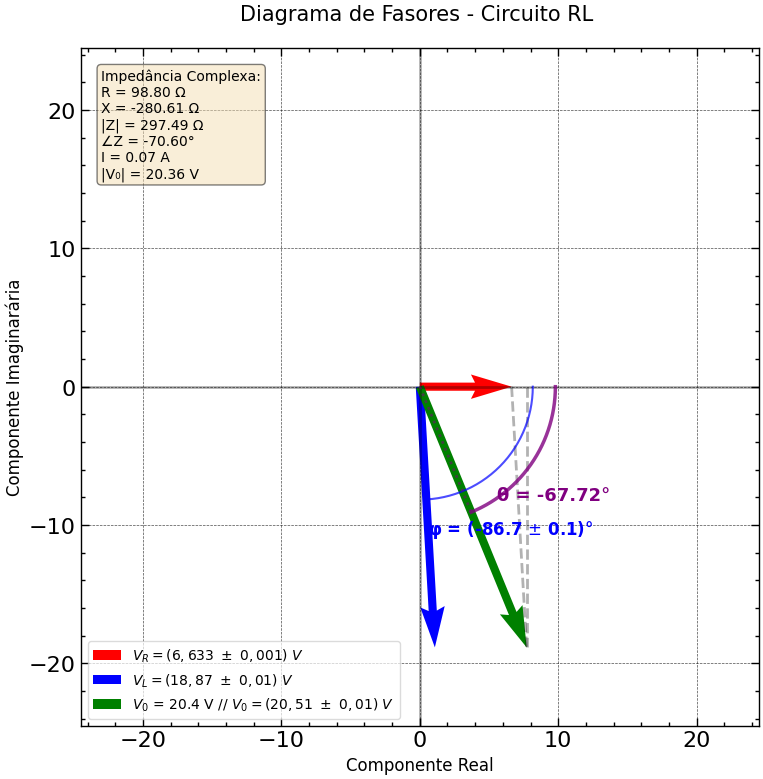

In [450]:
V_R_x = V_R
V_R_y = 0

V_X_x = V_X * np.cos(phi)
V_X_y = V_X * np.sin(phi)

V_0_x = V_R_x + V_X_x
V_0_y = V_R_y + V_X_y

# Cálculo da fase entre V_0 e V_R (theta)
theta = np.arctan2(V_0_y, V_0_x)

# Criação da figura com formato quadrado
fig, ax = plt.subplots(figsize=(8, 8))

# Definindo cores para cada vetor
colors = ['red', 'blue', 'green']

# Plotando os vetores
ax.quiver(0, 0, V_R_x, V_R_y, angles='xy', scale_units='xy', scale=1,
        color=colors[0], width=0.012, label='$V_R = (6,633 \ \pm \ 0,001) \ V$ ')

ax.quiver(0, 0, V_X_x, V_X_y, angles='xy', scale_units='xy', scale=1,
        color=colors[1], width=0.012, label='$V_{L} = (18,87\ \pm \ 0,01) \ V$')

ax.quiver(0, 0, V_0_x, V_0_y, angles='xy', scale_units='xy', scale=1,
        color=colors[2], width=0.012, label=f'$V_0$ = {np.sqrt(V_0_x**2 + V_0_y**2):.1f} V // $V_0 = (20,51 \ \pm \ 0,01) \ V$')

# Linhas auxiliares
ax.plot([V_R_x, V_0_x], [0, V_0_y], 'k--', alpha=0.3)
ax.plot([V_0_x, V_0_x], [0, V_0_y], 'k--', alpha=0.3)

# Configurações do gráfico
max_val = max(np.abs([V_R_x, V_X_x, V_0_x, V_X_y, V_0_y])) * 1.3  # Margem maior
ax.set_xlim(-max_val, max_val)
ax.set_ylim(-max_val, max_val)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.axhline(y=0, color='k', alpha=0.3)
ax.axvline(x=0, color='k', alpha=0.3)

# Títulos
plt.title('Diagrama de Fasores - Circuito RL ', fontsize=15, pad=20)
plt.xlabel('Componente Real', fontsize=12)
plt.ylabel('Componente Imaginarária', fontsize=12)

# Raio dos arcos (ajustado para evitar bordas)
arc_radius_phi = min(V_X * 1.2, max_val/3)
arc_radius_theta = min(np.sqrt(V_0_x**2 + V_0_y**2) * 0.6, max_val/2.5)

# Ângulo phi em azul
arc_phi = np.linspace(0, phi, 30)
ax.plot(arc_radius_phi * np.cos(arc_phi), arc_radius_phi * np.sin(arc_phi), 
        'b-', alpha=0.7, linewidth=1.5)

# Ângulo theta em roxo
arc_theta = np.linspace(0, theta, 30)
ax.plot(arc_radius_theta * np.cos(arc_theta), arc_radius_theta * np.sin(arc_theta), 
        'purple', linewidth=2.5, alpha=0.8)

# Posicionamento inteligente dos textos
def get_text_position(angle, radius, offset_factor=1.3, angle_offset=0.15):
        # Ângulo ajustado para evitar eixos
        adjusted_angle = angle/2 + angle_offset * (1 if angle > 0 else -1)
        return (
                radius * np.cos(adjusted_angle) * offset_factor,
                radius * np.sin(adjusted_angle) * offset_factor
        )

# Posições dos textos (com offset angular)
phi_text_x, phi_text_y = get_text_position(phi, arc_radius_phi, 1.3)
theta_text_x, theta_text_y = get_text_position(theta, arc_radius_theta, 1.4, 0.2)

# Deslocamento vertical se necessário
angle_diff = abs(theta - phi)
if angle_diff < 0.5:  # Ângulos próximos
        separation = max_val * 0.08
if phi > 0:
        phi_text_y += separation
        theta_text_y -= separation
else:
        phi_text_y -= separation
        theta_text_y += separation

# Texto para phi (azul)
ax.text(phi_text_x, phi_text_y, f'φ = ({np.degrees(phi):.1f} $\pm$ 0.1)°', 
        color='blue', fontsize=12, weight='bold',
        ha='center', va='center')

# Texto para theta (roxo)
ax.text(theta_text_x, theta_text_y, f'θ = {np.degrees(theta):.2f}°', 
        color='purple', fontsize=13, weight='bold',
        ha='center', va='center')

# Linha de referência para theta
ax.plot([0, arc_radius_theta * np.cos(theta)], 
        [0, arc_radius_theta * np.sin(theta)], 
        'purple', linestyle=':', alpha=0.5)

R = 98.8
I = V_R/R

# Cálculo da impedância complexa
X = (V_X * np.sin(phi)) / I
Z = complex(R, X)
Z_mag = abs(Z)
Z_phase = np.angle(Z, deg=True)
V_0 = complex(V_0_x, V_0_y)

# Texto de resultados - posicionamento inteligente
textstr = '\n'.join((
f'Impedância Complexa:',
f'R = {R:.2f} Ω',
f'X = {X:.2f} Ω',
f'|Z| = {Z_mag:.2f} Ω',
f'∠Z = {Z_phase:.2f}°',
f'I = {I:.2f} A',
f'|V₀| = {abs(V_0):.2f} V'
))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Determinar melhor posição para a caixa de texto
# Com base na posição dos vetores
dominant_quadrant = 0
if V_0_x > 0 and V_0_y > 0: dominant_quadrant = 1
elif V_0_x < 0 and V_0_y > 0: dominant_quadrant = 2
elif V_0_x < 0 and V_0_y < 0: dominant_quadrant = 3
elif V_0_x > 0 and V_0_y < 0: dominant_quadrant = 4

# Posicionar caixa no quadrante oposto
if dominant_quadrant in [1, 4]:
        # Vetores dominam direita -> colocar texto à esquerda
        text_x = 0.03
        text_y = 0.97
        halign = 'left'
        valign = 'top'  
elif dominant_quadrant == 2:
        # Vetores dominam superior esquerdo -> colocar inferior direito
        text_x = 0.97
        text_y = 0.03
        halign = 'right'
        valign = 'bottom'
else:
        # Default: superior esquerdo
        text_x = 0.03
        text_y = 0.97
        halign = 'left'
        valign = 'top'

ax.text(text_x, text_y, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment=valign, horizontalalignment=halign,
        bbox=props)

# Posicionar legenda em local seguro
if dominant_quadrant in [1, 4]:
# Se vetores na direita, legenda na esquerda inferior
        leg_loc = 'lower left'
else:
# Caso contrário, direita inferior
        leg_loc = 'lower right'

plt.legend(loc=leg_loc, fontsize=10, framealpha=0.7)

plt.tight_layout()